In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
import math
import numpy as np
import pandas as pd
from plotnine import *
from pandas import DataFrame
from sklearn import svm

# Hard SVM

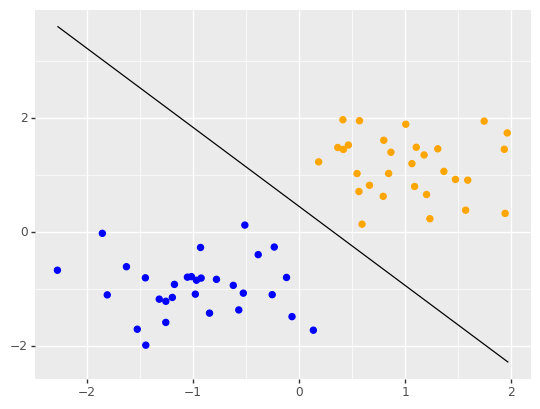

<ggplot: (-9223371923801569469)>

In [2]:
np.random.seed(0)
m = 30

# Picking 2 points
point1 = np.array([-1,-1])
point2 = np.array([1,1])

# Sampling 20 random samples from a normal (Gaussian) distribution around point1 (std = 0.5)
sample1 = np.random.normal(point1, 0.5, size = (m,2))

# Sampling 20 random samples from a normal (Gaussian) distribution around point2 (std = 0.5)
sample2 = np.random.normal(point2, 0.5, size = (m,2))


# fit the SVM model
X = np.concatenate((sample1, sample2))
Y = np.concatenate((np.zeros(m), np.ones(m)))  # sample1 label '0', sample2 label '1'
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)


# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(np.min(X), np.max(X))
yy = a * xx - (clf.intercept_[0]) / w[1]
    

# plot 
plot = (ggplot()
        + geom_line(aes(x='x', y='y'), data=DataFrame({'x':xx,'y':yy}),color = "black", size=0.5)
        + geom_point(aes(x='x', y='y'), data=DataFrame({'x':sample1[:,0],'y':sample1[:,1]}),color = "blue", size=2)
        + geom_point(aes(x='x', y='y'), data=DataFrame({'x':sample2[:,0],'y':sample2[:,1]}),color = "orange", size=2)
        + labs(x="", y=""))
plot

# Soft SVM

<IPython.core.display.Javascript object>


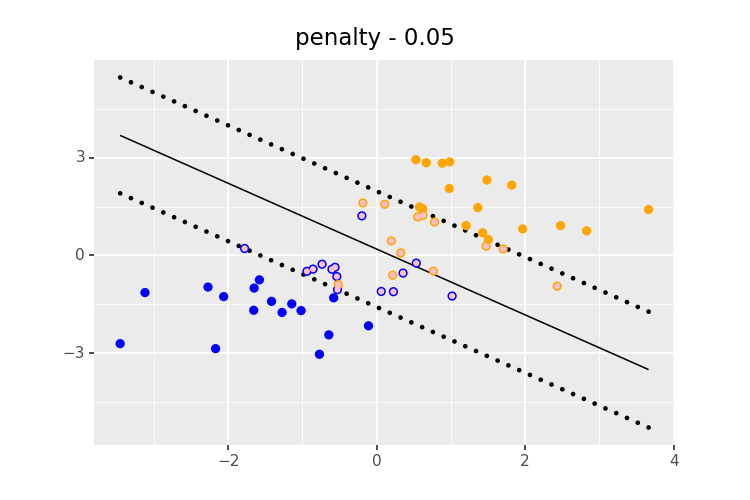

<ggplot: (17526971)>


<IPython.core.display.Javascript object>


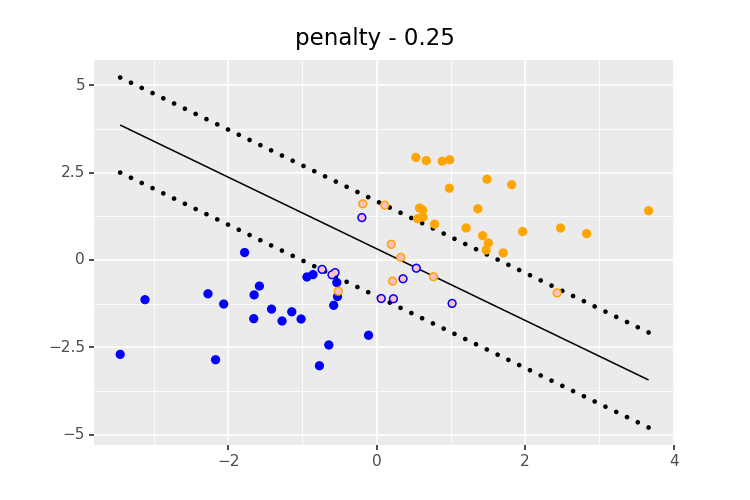

<ggplot: (17296337)>


<IPython.core.display.Javascript object>


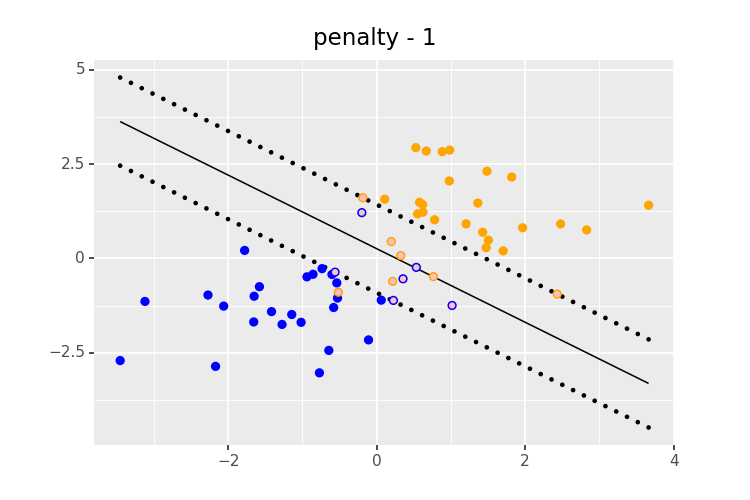

<ggplot: (12622559)>


In [36]:
    
    
# Sampling 20 random samples from a normal (Gaussian) distribution around point1 (std = 1)
sample1 = np.random.normal(point1, 1, size = (m,2))

# Sampling 20 random samples from a normal (Gaussian) distribution around point2 (std = 1)
sample2 = np.random.normal(point2, 1, size = (m,2))


X = np.concatenate((sample1,sample2))
Y = np.concatenate((np.zeros(m),np.ones(m)))



for penalty in [0.05, 0.25, 1]:
        clf = svm.SVC(kernel='linear', C = penalty)
        clf.fit(X, Y)

        # compute the separating hyperplane
        w = clf.coef_[0]
        a = -w[0] / w[1]
        xx = np.linspace(np.min(X), np.max(X))
        yy = a * xx - (clf.intercept_[0]) / w[1]
    
    
        # the parallels to the seperating hyperplane that pass through the support vectors. 
        # This is sqrt(1+a^2) away vertically in 2-d.
        margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
        yy_down = yy - np.sqrt(1 + a ** 2) * margin
        yy_up = yy + np.sqrt(1 + a ** 2) * margin



        plot = (ggplot()
            + geom_line(aes(x='x', y='y'), data=DataFrame({'x':xx,'y':yy}), size=0.5)
            + geom_point(aes(x='x', y='y'), data=DataFrame({'x':xx,'y':yy_down}), size=0.5)
            + geom_point(aes(x='x', y='y'), data=DataFrame({'x':xx,'y':yy_up}), size=0.5)
            + geom_point(aes(x='x', y='y'), data=DataFrame({'x':sample1[:,0],'y':sample1[:,1]}),color = "blue", size=2)
            + geom_point(aes(x='x', y='y'), data=DataFrame({'x':sample2[:,0],'y':sample2[:,1]}),color = "orange", size=2)
            + geom_point(aes(x='x', y='y'), data=DataFrame({'x':clf.support_vectors_[:, 0],'y':clf.support_vectors_[:, 1]}),color = "pink", size=1)
            + ggtitle("penalty - " + str(penalty))
            + labs(x="", y=""))

        print(plot)
    
    

# Kernel

<IPython.core.display.Javascript object>


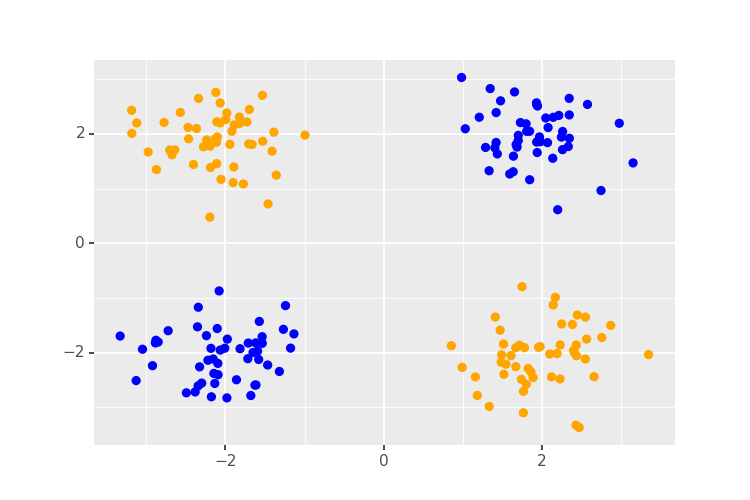

<ggplot: (17582229)>

In [37]:
# Sample size
m = 50

# Sampling 4 points (one for each quardant)
pos = np.array([2,2,2,2])
neg = -pos

# each point goes to label
label0 = [[pos[0], pos[1]], [neg[0], neg[1]]]
label1 = [[pos[2], neg[2]], [neg[3], pos[3]]]


# Sampling m random samples from a normal (Gaussian) distribution around each point that are label 0 (std = 0.5)
sample1 = np.concatenate((np.random.normal(label0[0], 0.5, size = (m,2)),
                         np.random.normal(label0[1], 0.5, size = (m,2))))

# Sampling m random samples from a normal (Gaussian) distribution around each point that are label 1 (std = 0.5)
sample2 = np.concatenate((np.random.normal(label1[0], 0.5, size = (m,2)), 
                         np.random.normal(label1[1], 0.5, size = (m,2))))

# plot
plot = (ggplot()
        + geom_point(aes(x='x', y='y'), data=DataFrame({'x':sample1[:,0],'y':sample1[:,1]}),color = "blue", size=2)
        + geom_point(aes(x='x', y='y'), data=DataFrame({'x':sample2[:,0],'y':sample2[:,1]}),color = "orange", size=2)
        + labs(x="", y=""))
plot

<IPython.core.display.Javascript object>


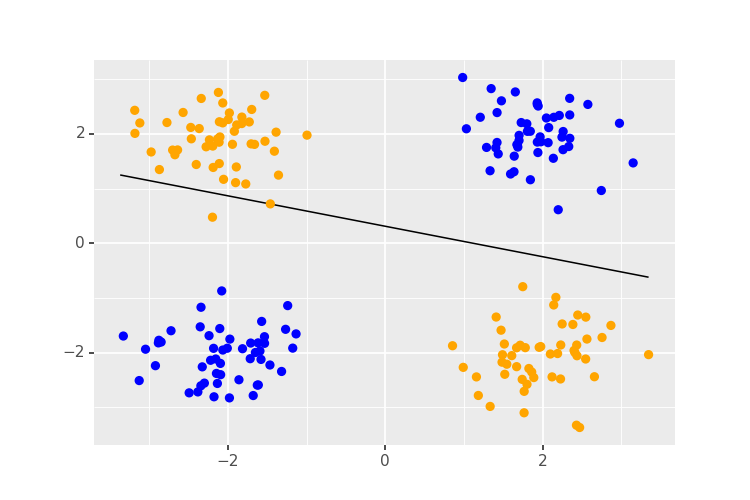

<ggplot: (17588887)>

In [38]:
X = np.concatenate((sample1,sample2))
Y = np.concatenate((np.zeros(m*2),np.ones(m*2)))


clf = svm.SVC(kernel='linear')
clf.fit(X, Y)


# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(np.min(X), np.max(X))
yy = a * xx - (clf.intercept_[0]) / w[1]
    

# plot 
plot = (ggplot()
        + geom_line(aes(x='x', y='y'), data=DataFrame({'x':xx,'y':yy}),color = "black", size=0.5)
        + geom_point(aes(x='x', y='y'), data=DataFrame({'x':sample1[:,0],'y':sample1[:,1]}),color = "blue", size=2)
        + geom_point(aes(x='x', y='y'), data=DataFrame({'x':sample2[:,0],'y':sample2[:,1]}),color = "orange", size=2)
        + labs(x="", y=""))
plot 

In [18]:
def ker_space (X):
    return np.column_stack((X[:,0]**2, X[:,1]**2, np.sqrt(2)*X[:,0]*X[:,1]))

s1_ker = ker_space(sample1)
s2_ker = ker_space(sample2)

<IPython.core.display.Javascript object>


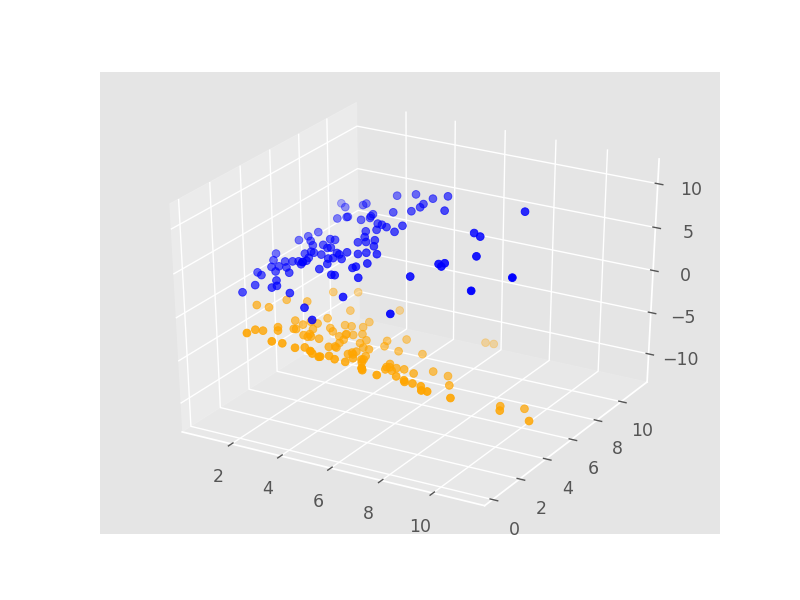

In [19]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(s1_ker[:,0], s1_ker[:,1], s1_ker[:,2], color="blue")
ax.scatter(s2_ker[:,0], s2_ker[:,1], s2_ker[:,2], color="orange")

plt.show()

### Option 1: Solve linearly in the kernel space

In [20]:
X_ker = ker_space(X)
clf1 = svm.SVC(kernel='linear')
clf1.fit(X_ker, Y)
w1 = np.squeeze(clf1.coef_)

<IPython.core.display.Javascript object>


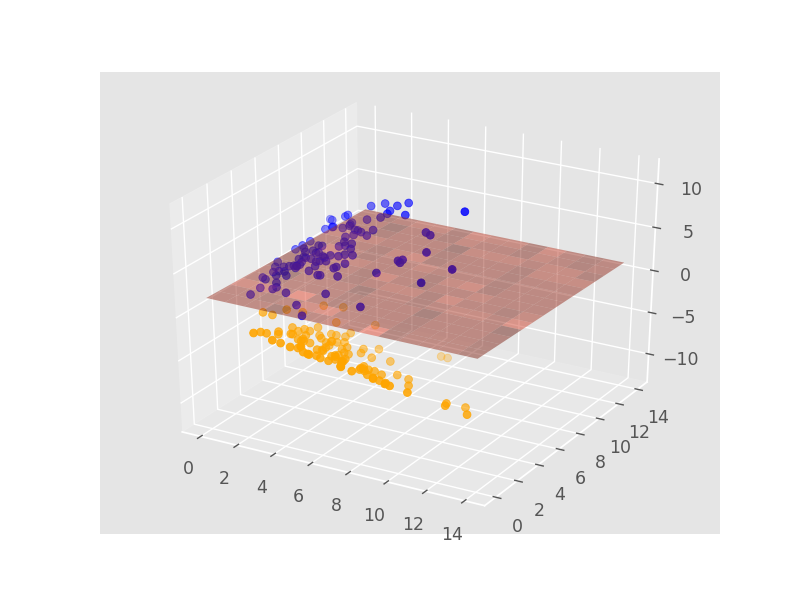

In [21]:
%matplotlib notebook

# plot the separation hyperplane
point = clf1.support_vectors_[0]
d = -point.dot(w1)
xx, yy = np.meshgrid(range(15), range(15))
zz = (-w1[0] * xx - w1[1] * yy - d) * 1. / w1[2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(s1_ker[:,0], s1_ker[:,1], s1_ker[:,2], color="blue")
ax.scatter(s2_ker[:,0], s2_ker[:,1], s2_ker[:,2], color="orange")
ax.plot_surface(xx, yy, zz, alpha = 0.5) 
plt.show()

### Option 2: Use the kernel trick

We have $x=[x_1,x_2]$ and $\phi(x) = [x_1^2, x_2^2, \sqrt{2}x_1 x_2]$, therefore the kernel is:

$$K(x,\hat{x}) = \langle \phi(x), \phi(\hat{x}) \rangle = x_1^2 \hat{x}_1^2 + x_2^2 \hat{x}_2^2 + 2x_1x_2\hat{x}_1\hat{x}_2 = (x_1\hat{x}_1 + x_2\hat{x}_2)^2 = \langle x,\hat{x} \rangle^2$$

In [22]:
def my_kernel(Xa, Xb):
    return (np.dot(Xa,Xb.transpose())**2)

clf2 = svm.SVC(kernel=my_kernel)
clf2.fit(X, Y)

# and using the representer theorem:
w2 = np.squeeze(np.dot(clf2.dual_coef_ , ker_space(X[clf2.support_,:])))

In [23]:
print('w1 =', w1)
print('w2 =', w2)

('w1 =', array([-0.00254106, -0.0259059 , -0.58877259]))
('w2 =', array([-0.00254106, -0.0259059 , -0.58877259]))


**Note**: we know that the classification border is the set
$$\{x : y\langle w,\phi(x) \rangle = 1 \}$$
thus we can write
$$ \pm 1 = \langle w,\phi(x) \rangle = w_1x_1^2 + w_2x_2^2 + \sqrt{2} w_3 x_1x_2 = 
\begin{bmatrix}
x_1 & x_2
\end{bmatrix}
\begin{bmatrix}
w_1 & w_3/\sqrt{2} \\ w_3/\sqrt{2} & w_2
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2
\end{bmatrix}
$$

As the last matrix is symmetric, it is diagonalizable, thus we get two hyperbolas centered at the norm of the diagonal, and a rotation by an orthonormal matrix.

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


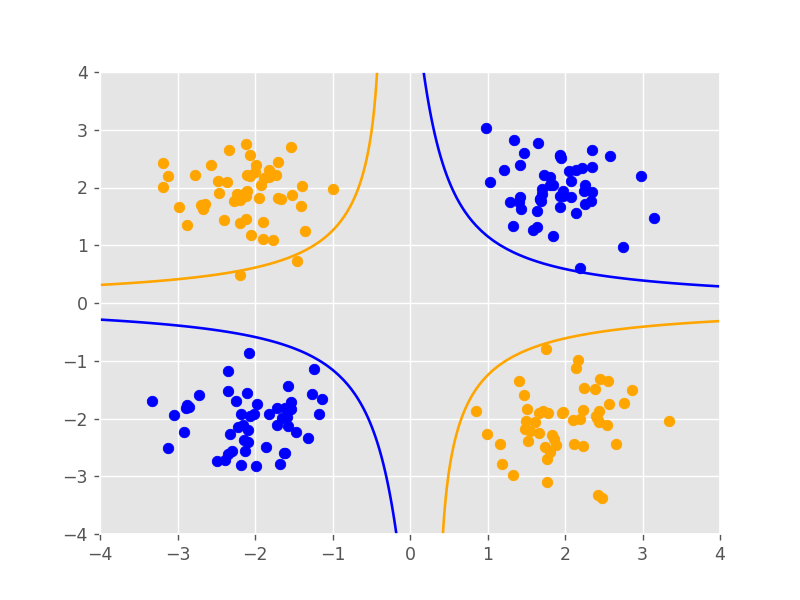

In [24]:
%matplotlib auto

def f(X, w):
    return np.dot(ker_space(X) , w)

w = w1
X1, X2 = np.mgrid[-4:4:100j, -4:4:100j]
Z = f(np.column_stack((X1.flatten(),X2.flatten())), w)

plt.style.use('ggplot')
plt.scatter(sample1[:,0], sample1[:,1], c="blue")
plt.scatter(sample2[:,0], sample2[:,1], c="orange")
plt.contour(X1, X2, np.reshape(Z+1, X1.shape), levels=[0], colors="blue")
plt.contour(X1, X2, np.reshape(Z-1, X1.shape), levels=[0], colors="orange")
plt.show()